# Analysis of students with at least 3 "A or H2" passes in English

### Part of DATA ANALYSIS GROUP-4 PROJECT

## Project Assigment Rubrics

1. Demonstrate competency in using the Python Pandas package for **data cleaning and analysis** and 
Python visualization packages for **data visualization**.
2. Demonstrate competency in applying the insights gained from the outputs of your Python programs to 
deliver a useful data analysis presentation for your stakeholders.

## Project Assigment Requirements

1. Your name and the title of your data analysis.
2. The questions you want to answer to gain deeper insights into the chosen datasets such that you are able to 
craft a ‘storyline’ or produce an interesting data analysis on it.
3. For the chosen datasets, explain the nature of the dataset (i.e. what is in the dataset) or any pecularities
about it you wish to highlight.
4. Write Python code that uses the pandas package to extract useful statistical or summary information about 
the data and Python visualization package to produce useful data visualizations that explain the data.
5. Highlight the insights you have gained from analysing the data and any conclusions or recommendations you 
want to make as a result of the analysis.

## Reserach Questions:
  
1. What's the trending of percentage-of-students with at least 3 "A or H2" passes?
2. Is there any correlation between the pass rate and teachers' quolification and length of services?
3. Is there any correlation between at 3 "A or H2" passes rate with at least 5 o-level passes?

## Dataset file:

The dataset is downloaded from https://data.gov.sg/dataset/percentage-of-students-with-at-least-3-a-h2-passes-and-pass-in-gp-or-ki

###  Import Libraries
We add libraries using the <font color ='green'> **import**</font> followed by the name of the library. We also add acronyms by using <font color ='green'> **as**</font> acronyms to call the library using less characters. 
Such as <font color ='green'> **import**</font> pandas <font color ='green'> **as**</font>  pd

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Frame

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 
Arithmetic operations align on both row and column labels. The primary pandas data structure.

Essentially a DataFrame is composed of the following three elements:

1) the **index** labels (these are the bold numbers from 0 to 9 on the left hand side of the table)

2) the **column names** (these are the bold names on the top of the table)

3) the **data** itself (this is everything else inside the actual cells of the table)

### Load the dataset file

In [9]:
df = pd.read_csv('4_percentage-of-students-with-at-least-3-a-h2-passes.csv', sep=',')

df.tail()

,year,race,percentage_pass
165,2020,Malay,89.3
166,2020,Chinese,94.5
167,2020,Indian,89.2
168,2020,Others,90.3
169,2020,Overall,93.7


### Shape of Dataset

The first thing that we should do when we get any new data to play with is to check out it's dimensions, what it looks like, number of rows, columns, etc. Depending on the context, we can also run preliminary checks on number of zero, null values, etc. 

<b><i>First thoughts and observations?</i></b>

1. Missing metadata - so source for it  
2. Categories of race
2. any Null values and missing values

In [10]:
# Get the dateset basic information
print(f'The shape of dataset is: {df.shape}'), print()

print(f'The data types are as follows:') 
print(df.dtypes); print()

print(f'The size of the dataset is: {df.size}'); print()

The shape of dataset is: (170, 3)

The data types are as follows:
year                 int64
race                object
percentage_pass    float64
dtype: object

The size of the dataset is: 510



In [11]:
df['race'].value_counts()
#Hint: This will also tell you when this dataset was extracted!

Malay      34
Chinese    34
Indian     34
Others     34
Overall    34
Name: race, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             170 non-null    int64  
 1   race             170 non-null    object 
 2   percentage_pass  170 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


### Extract subsets of the dataset

In [13]:
# Subsetting rows in a dataframe
chinese80percpassed = df[df.race == 'Chinese']
chinese80percpassed.count()

year               34
race               34
percentage_pass    34
dtype: int64

In [14]:
df[df['race'] == 'Chinese']['percentage_pass'].mean()

87.2235294117647

In [31]:
# Subsetting rows in a dataframe
atleast80percpassed = df[df["percentage_pass"] >= 80]
mydf3 = atleast80percpassed[['race','percentage_pass']].groupby('race').count()
print(f'The year count with students with more than 80% pass rate by race: ')
print(mydf3)

The year count with students with more than 80% pass rate by race: 
         percentage_pass
race                    
Chinese               30
Indian                26
Malay                 11
Others                30
Overall               30


## Data cleaning and analysis

In [87]:
# count the missing value
df.isna().sum()

year               0
race               0
percentage_pass    0
dtype: int64

From the information of the dataset stated above, there is no null valuses in the dataset. <br> However we can still use the fillna or dropna for data cleaning in case the dataset is updated with null or missing values in future. 

In [18]:
# Handling & cleaning data
mydf1 = df.isnull()

print(f'***** Use isnull to see if a column or row contain data *****')
print(mydf1.iloc[-5:])

***** Use isnull to see if a column or row contain data *****
      year   race  percentage_pass
165  False  False            False
166  False  False            False
167  False  False            False
168  False  False            False
169  False  False            False


In [19]:
mydf1 = df.isnull()

mydf2 = df.fillna({'percentage_pass' : df[df['race'] == 'Chinese']['percentage_pass'].mean()}, inplace=False)
print(mydf2)

mydf2 = mydf2.dropna()
mydf2.tail()

     year     race  percentage_pass
0    1987    Malay             58.9
1    1987  Chinese             75.4
2    1987   Indian             72.7
3    1987   Others             67.6
4    1987  Overall             74.2
..    ...      ...              ...
165  2020    Malay             89.3
166  2020  Chinese             94.5
167  2020   Indian             89.2
168  2020   Others             90.3
169  2020  Overall             93.7

[170 rows x 3 columns]


,year,race,percentage_pass
165,2020,Malay,89.3
166,2020,Chinese,94.5
167,2020,Indian,89.2
168,2020,Others,90.3
169,2020,Overall,93.7


In [34]:
# We use .describe() method to get the summary statistics of all numeric variables/features
mydf2.percentage_pass.describe()

count    170.000000
mean      83.445294
std        8.771937
min       49.300000
25%       79.775000
50%       86.150000
75%       89.175000
max       95.000000
Name: percentage_pass, dtype: float64

### Splitting the races by group for analysis

In [39]:
# Caculate the means for each race group
mydf2[['race','percentage_pass']].groupby('race').mean()

,percentage_pass
race,
Chinese,87.223529
Indian,83.185294
Malay,73.667647
Others,86.852941
Overall,86.297059


## Data visualization

#### Time series line chart for overall percentage_pass rate

    year     race  percentage_pass
4   1987  Overall             74.2
9   1988  Overall             72.5
14  1989  Overall             68.6
19  1990  Overall             76.5
24  1991  Overall             83.1


Text(0, 0.5, 'Percentage of pass')

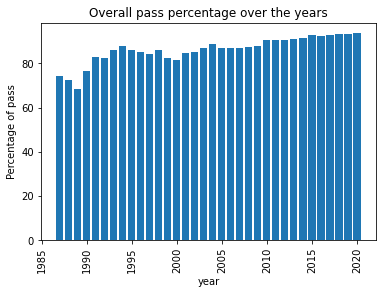

In [83]:
import matplotlib.pyplot as plt
race_Overall = mydf2[mydf2['race'] == 'Overall']
print(race_Overall.head())

plt.bar(race_Overall.year, race_Overall.percentage_pass)
plt.xticks(rotation=90)
plt.title('Overall pass percentage over the years')
plt.xlabel('year')
plt.ylabel('Percentage of pass')

#### Time series line chart for different group of races on percentage_pass

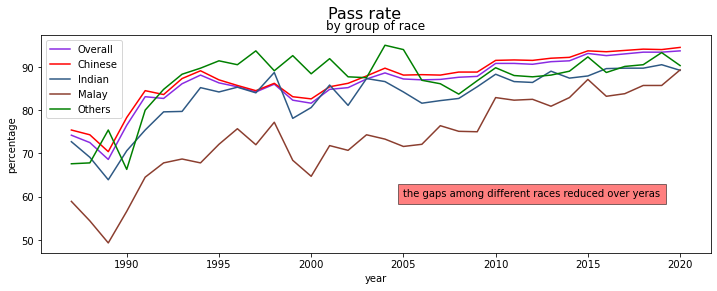

In [86]:
# split by race for grouping
race_Overall = mydf2[mydf2['race'] == 'Overall']
race_Chinese = mydf2[mydf2['race'] == 'Chinese']
race_Indian = mydf2[mydf2['race'] == 'Indian']
race_Malay = mydf2[mydf2['race'] == 'Malay']
race_Others = mydf2[mydf2['race'] == 'Others']

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Pass rate', fontsize=16, ha='center')

ax = fig.add_subplot(111)
ax.plot(race_Overall.year, race_Overall.percentage_pass, label = "Overall",color='#8A2BE2')
ax.plot(race_Chinese.year, race_Chinese.percentage_pass, label = "Chinese",color='red')
ax.plot(race_Indian.year, race_Indian.percentage_pass, label = "Indian", color='#2E5984')
ax.plot(race_Malay.year, race_Malay.percentage_pass, label = "Malay", color='#8B3E2F')
ax.plot(race_Others.year, race_Others.percentage_pass, label = "Others", color='green')

ax.set_title('by group of race')
ax.set_xlabel('year')
ax.set_ylabel('percentage')
plt.text(2005, 60, 'the gaps among different races reduced over yeras', bbox={'facecolor':'red', 'alpha':0.5, 'pad':5})

plt.legend()
plt.show()

#### Box Plots for different race

In [ ]:
#set up the labels on the x-axis
x_labels = np.array(['Overall', 'Chinese', 'Indian', 'Malay', 'Others'])
#x_ticks = np.arange(len(x_labels))
#plt.xticks()

#set up the labels on the axises and title
plt.title('Median Rentals in Orchard, Outside Central Area and Central Area')
plt.xlabel('Locality', fontsize=20, labelpad=20)
plt.ylabel('$psf', fontsize=20, labelpad=20)

plt.boxplot(y_values.transpose(),labels=x_labels, patch_artist=False)
plt.show()

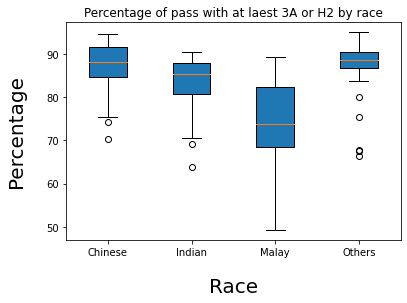

In [108]:
#set up the values
race_Overall_rate = mydf2[mydf2['race'] == 'Overall']['percentage_pass']
race_Chinese_rate = mydf2[mydf2['race'] == 'Chinese']['percentage_pass']
race_Indian_rate = mydf2[mydf2['race'] == 'Indian']['percentage_pass']
race_Malay_rate = mydf2[mydf2['race'] == 'Malay']['percentage_pass']
race_Others_rate = mydf2[mydf2['race'] == 'Others']['percentage_pass']

y_values = np.array([race_Chinese_rate, race_Indian_rate, race_Malay_rate, race_Others_rate])

#set up the labels on the x-axis
x_labels = np.array(['Chinese', 'Indian', 'Malay', 'Others'])
x_ticks = np.arange(len(x_labels))
plt.xticks()

#set up the labels on the axises and title
plt.title('Percentage of pass with at laest 3A or H2 by race')
plt.xlabel('Race', fontsize=20, labelpad=20)
plt.ylabel('Percentage', fontsize=20, labelpad=20)

plt.boxplot(y_values.transpose(),labels=x_labels, patch_artist=True)
plt.show()

#### Interpreting the visualization